## 1 - Setup

In [ ]:
#Import necessary libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import math

## 2 - Load Data

In [ ]:
#Read the dataset.
df = pd.read_csv("../data/raw_data/amazon_sales_dataset.csv")

In [ ]:
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [ ]:
#Columns of the dataset
df.columns

Index(['order_id', 'order_date', 'product_id', 'product_category', 'price',
       'discount_percent', 'quantity_sold', 'customer_region',
       'payment_method', 'rating', 'review_count', 'discounted_price',
       'total_revenue'],
      dtype='object')

In [ ]:
#Check the dimensions of the dataset.
df.shape

(50000, 13)

## 3 - Data Cleaning

In [ ]:
#Check the missing values in the dataset.
df.isnull().sum()

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

In [ ]:
#Check the data types of the columns.
df.dtypes

order_id              int64
order_date           object
product_id            int64
product_category     object
price               float64
discount_percent      int64
quantity_sold         int64
customer_region      object
payment_method       object
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object

In [10]:
#order_date is in object format, we need to convert it to datetime format.
df['order_date'] = pd.to_datetime(df['order_date'])

There are no misspelled words in the dataset.

In [15]:
#Check for duplicates in the dataset.
df.duplicated().sum()

np.int64(0)

In [ ]:
#Function to check misspelled values in categorical columns.
def check_unique_values(df, columns):
    for col in columns:
        unique_vals = df[col].unique()
        print(f"Column: {col}")
        print(f"Number of unique values: {len(unique_vals)}")
        print(f"Unique values: {unique_vals}\n")

In [24]:
#Check for misspelled values in categorical columns.
categorical_cols = ['product_category', 'customer_region', 'payment_method']
check_unique_values(df, categorical_cols)

Column: product_category
Number of unique values: 6
Unique values: ['Books' 'Fashion' 'Sports' 'Beauty' 'Electronics' 'Home & Kitchen']

Column: customer_region
Number of unique values: 4
Unique values: ['North America' 'Asia' 'Europe' 'Middle East']

Column: payment_method
Number of unique values: 5
Unique values: ['UPI' 'Credit Card' 'Wallet' 'Cash on Delivery' 'Debit Card']



In [ ]:
#Check for negative values in the dataset.
def check_negative(df, column):
    neg_rows = df[df[column] < 0]
    print(f"Negative values in {column}: {len(neg_rows)}")
    return neg_rows

columns = ['price', 'quantity_sold', 'discount_percent', 'rating', 'review_count',
           'discounted_price', 'total_revenue']

for col in columns:
    neg_values = check_negative(df, col)
    if not neg_values.empty:
        print(neg_values[[col]])

Negative values in price: 0
Negative values in quantity_sold: 0
Negative values in discount_percent: 0
Negative values in rating: 0
Negative values in review_count: 0
Negative values in discounted_price: 0
Negative values in total_revenue: 0


In [25]:
#Discount percent is in percentage format, we need to convert it to fraction format.
df['discount_fraction'] = df['discount_percent'] / 100



In [26]:
df.describe()

,order_id,order_date,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue,discount_fraction
count,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2022-12-31 10:47:16.800000256,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475,0.133407
min,1.000000,2022-01-01 00:00:00,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000,0.000000
25%,12500.750000,2022-07-02 00:00:00,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000,0.050000
50%,25000.500000,2023-01-02 00:00:00,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000,0.100000
75%,37500.250000,2023-07-02 00:00:00,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000,0.200000
max,50000.000000,2023-12-31 00:00:00,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000,0.300000
std,14433.901067,NaN,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968,0.098507


In [30]:
#Check the number of unique products in the dataset.
df["product_id"].nunique()

4000

In [31]:
#Drop unnecessary columns.
df = df.drop(columns=['order_id','discount_percent'])

In [32]:
df.columns

Index(['order_date', 'product_id', 'product_category', 'price',
       'quantity_sold', 'customer_region', 'payment_method', 'rating',
       'review_count', 'discounted_price', 'total_revenue',
       'discount_fraction'],
      dtype='object')

## 4 - Outlier Check

In [ ]:
#List of numeric columns for visualization.
numeric_cols = [ 'price', 'quantity_sold', 'rating', 'review_count',
       'discounted_price', 'total_revenue', 'discount_fraction']

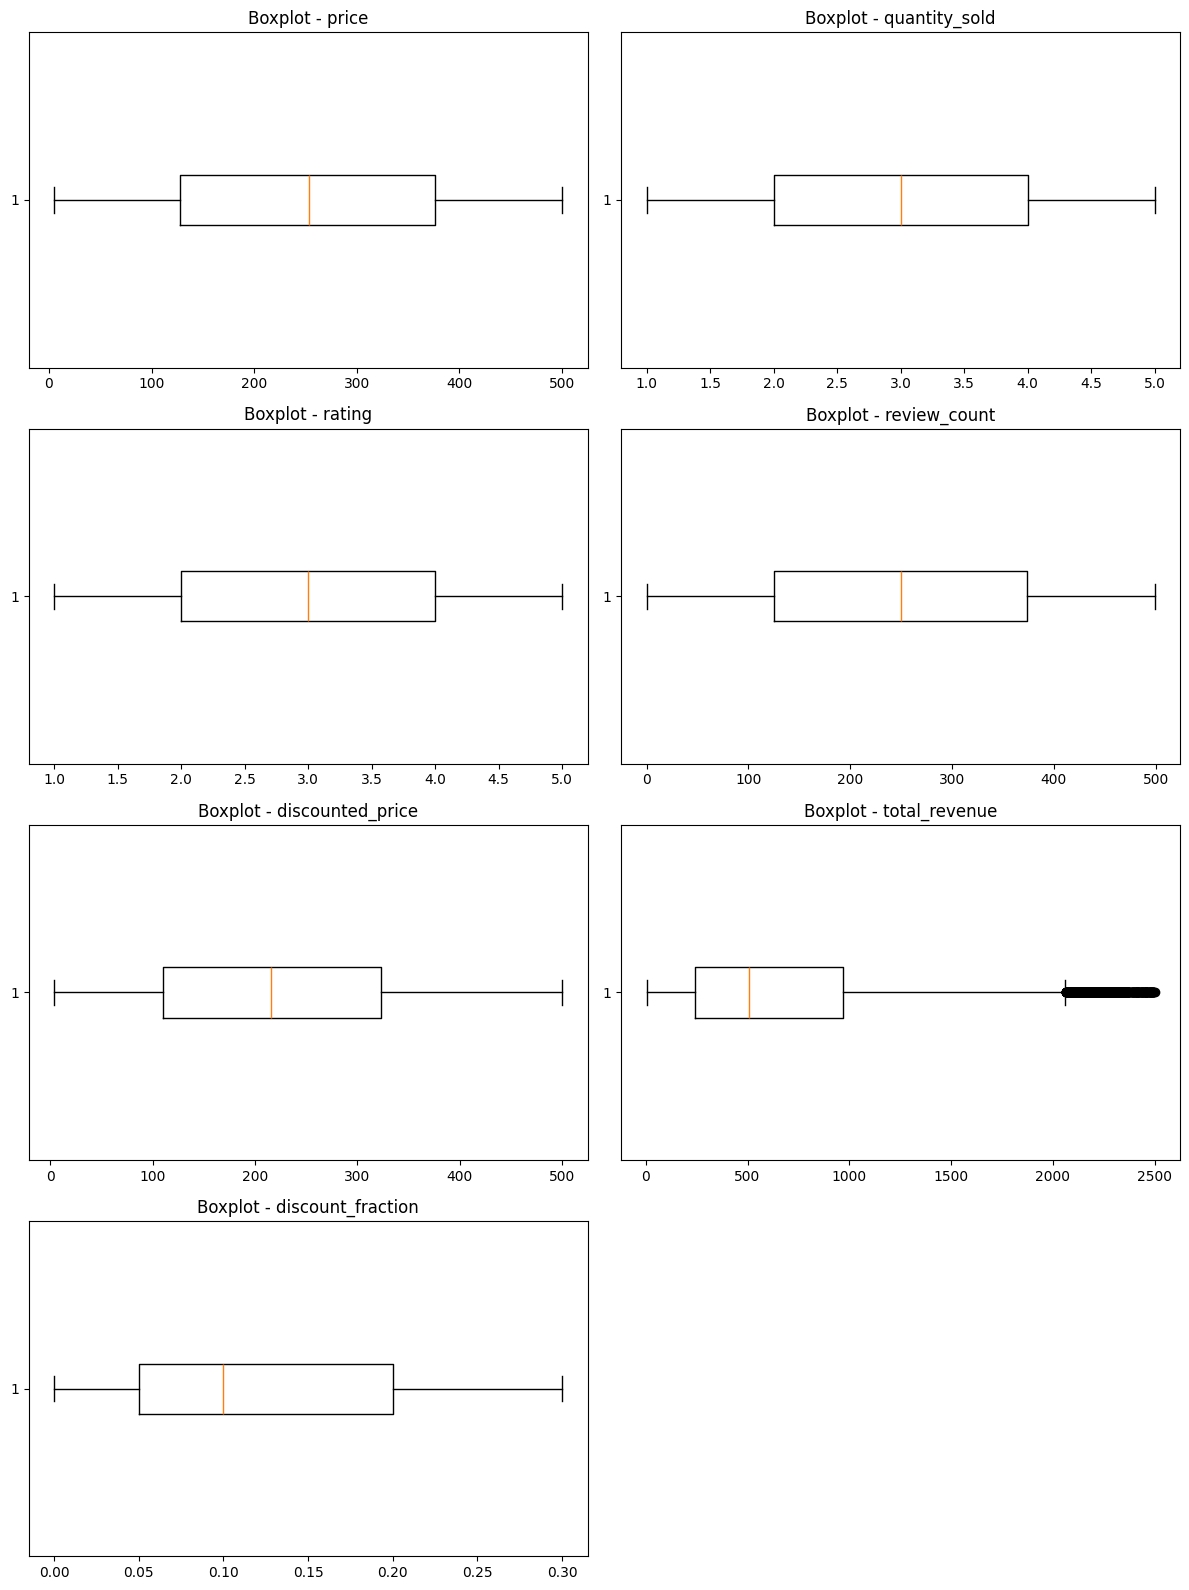

In [ ]:
#Visualize the distribution of numeric columns using boxplots.
n_cols = 2  
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()

In [ ]:
#Identify outliers using the IQR method and summarize the findings.
outlier_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    outlier_summary.append({
        "column": col,
        "outlier_count": len(outliers),
        "lower_bound": round(lower,2),
        "upper_bound": round(upper,2)
    })

pd.DataFrame(outlier_summary)

,column,outlier_count,lower_bound,upper_bound
0,price,0,-244.90,749.08
1,quantity_sold,0,-1.00,7.00
2,rating,0,-1.00,7.00
3,review_count,0,-248.50,747.50
4,discounted_price,0,-209.85,642.24
5,total_revenue,752,-852.66,2061.95
6,discount_fraction,0,-0.18,0.43


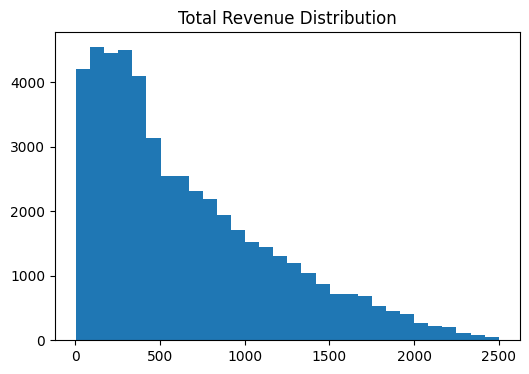

In [41]:
plt.figure(figsize=(6,4))
plt.hist(df['total_revenue'], bins=30)
plt.title("Total Revenue Distribution")
plt.show()

The left-skewed (positively skewed) distribution of total revenue is expected in sales data.

-  Most transactions are concentrated around lower purchase amounts.
-  A small number of high-value transactions drive a significant portion of the total revenue.

This pattern is typical in e-commerce and retail datasets, where revenue distribution is often right-skewed due to the presence of a few large orders.

## 5 - Save Cleaned Data

In [48]:
df.to_csv("../data/cleaned_data/cleaned_amazon_sales_dataset.csv", index=False)